# Theano Basics

## Multiplying two numbers

In [67]:
import theano
from theano import tensor as T

In [68]:
a = T.scalar()
b = T.scalar()
y = a * b

In [69]:
our_cool_multiply_func = theano.function(inputs=[a, b], outputs=y)
print our_cool_multiply_func(1, 2) # 2.0
print our_cool_multiply_func(3, 3) # 9.0

2.0
9.0


## Linear Regression with Theano

Generate some data:

In [70]:
import numpy as np

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

In [71]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

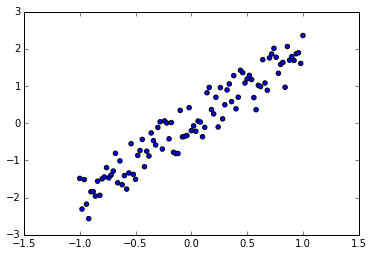

In [72]:
plt.scatter(trX, trY)

Define our model

In [73]:
X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

learning_rate = 0.01
cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * learning_rate]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates,
                        allow_input_downcast=True)

In [74]:
num_epochs = 15
errors = []
for epoch in range(num_epochs):
    error = 0.0
    for x, y in zip(trX, trY):
        error += train(x, y)
    print epoch, error
    errors.append(error)

print
print "estimated slope:", w.get_value() # something around 2

0 89.0031616791
1 32.2640184754
2 17.9639294878
3 14.3460227028
4 13.4237958134
5 13.1852856869
6 13.1219077259
7 13.1042425523
8 13.0989293199
9 13.0971558013
10 13.0964898312
11 13.0962122105
12 13.0960872681
13 13.0960264941
14 13.0959988726

estimated slope: 2.0011639595


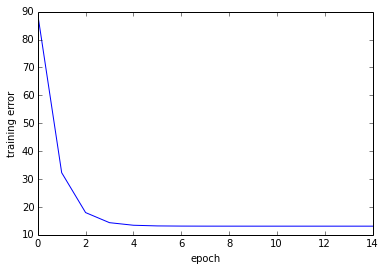

In [76]:
plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('training error')